### 车辆模型测试：仿真 ###
车辆参数：
1. 轴距         L = 0.1m
2. 前后轮距     2*d = 0.08m
3. 最大打角     s_angle = 0.7 rad 
4. 最大速度     v_max = 0.5 m/s
5. 最大加速度    a_max = 0.5 m/s^2


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

class CarModel:


    L           = 0.1
    d           = 0.04
    theta_max   = 0.7
    v_max       = 0.5
    a_max       = 0.5

    # input 
    a           = 0.0
    theta       = 0.0
    v           = 0.0

    # state
    x           = 0.0
    y           = 0.0
    phi         = 0.0

    def __init__(self):
        pass
    def inputControl(self, v, theta):
        if v > self.v_max:
            v = self.v_max
        elif v < -self.v_max:
            v = self.v_max * -1
        if theta > self.theta_max:
            theta = self.theta_max
        elif theta < -self.theta_max:
            theta = self.theta_max * -1
        self.v = v
        self.theta = theta
    def inputPose(self, x, y, phi):
        self.x = x
        self.y = y
        self.phi = phi
    def update(self, dt):
        try:
            R = self.L / math.tan(self.theta)
        except ZeroDivisionError:
            R = self.L / 1e-10
        # R = abs(R)
        x_dif = self.v * math.cos(self.phi)
        y_dif = self.v * math.sin(self.phi)
        phi_dif = self.v / R * dt

        self.x += x_dif * dt
        self.y += y_dif * dt
        self.phi += phi_dif 
        self.phi = self.phi % (2 * math.pi)

    def getState(self):
        return self.x, self.y, self.phi
    
    def get_velocity(self):
        return self.v
    
    def reset(self):
        self.x = 0.0
        self.y = 0.0
        self.phi = 0.0
        self.v = 0.0
        self.theta = 0.0
        self.a = 0.0
        self.v = 0.0
        self.theta = 0.0



[0.001, 0.0019999645277239226, 0.0029998226411361776, 0.003999503405750691, 0.004998935899663318, 0.00599804921858337, 0.006996772480863884, 0.007995034832530291, 0.008992765452307119, 0.009989893556642376, 0.01098634840472926, 0.011982059303524832, 0.012976955612765299, 0.01397096674997756, 0.014964022195486652, 0.015956051497418727, 0.016946984276699235, 0.017936750232045932, 0.018925279144956383, 0.019912500884689564, 0.020898345413241277, 0.021882742790312944, 0.02286562317827351, 0.023846916847114027, 0.02482655417939463, 0.0258044656751835, 0.026780581956987532, 0.02775483377467425, 0.028727152010384772, 0.02969746768343731, 0.030665711955220987, 0.03163181613407957, 0.03259571168018475, 0.03355733021039869, 0.03451660350312541, 0.035473463503150775, 0.0364278423264706, 0.03737967226510669, 0.03832888579191031, 0.039275415565352904, 0.04021919443430359, 0.04116015544279319, 0.04209823183476435, 0.04303335705880755, 0.04396546477288257, 0.04489448884902508, 0.045820363378038055, 0

<Figure size 640x480 with 0 Axes>

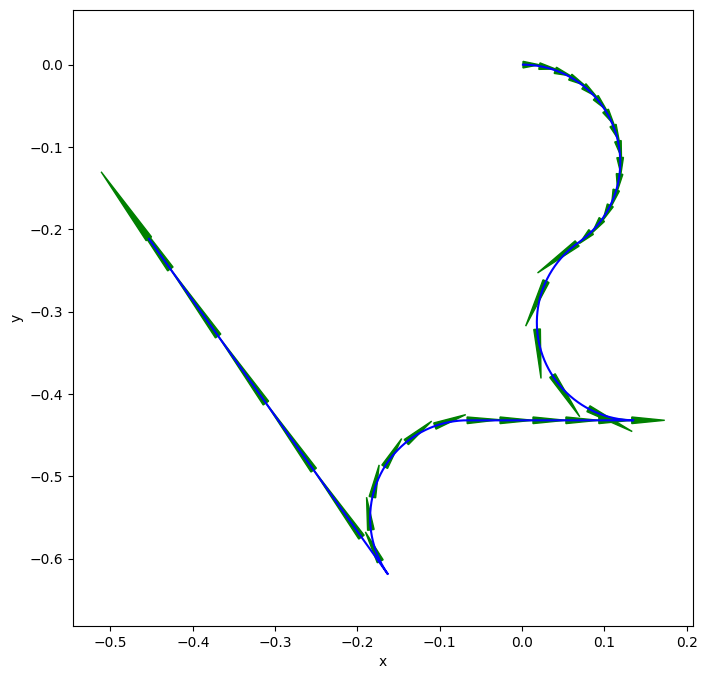

In [39]:
car = CarModel()
car.reset()
x_list = []
y_list = []
phi_list = []
v_list = []
for i in range(300):
    car.inputControl(0.1, -0.7)
    car.update(0.01)
    x, y, phi = car.getState()
    v = car.get_velocity()
    x_list.append(x)
    y_list.append(y)
    phi_list.append(phi)
    v_list.append(v)
for i in range(100):
    car.inputControl(0.3, 0.7)
    car.update(0.01)
    x, y, phi = car.getState()
    v = car.get_velocity()
    x_list.append(x)
    y_list.append(y)
    phi_list.append(phi)
    v_list.append(v)
for i in range(100):
    car.inputControl(-0.2, 0.0)
    car.update(0.01)
    x, y, phi = car.getState()
    v = car.get_velocity()
    x_list.append(x)
    y_list.append(y)
    phi_list.append(phi)
    v_list.append(v)
for i in range(100):
    car.inputControl(-0.2, -0.7)
    car.update(0.01)
    x, y, phi = car.getState()
    v = car.get_velocity()
    x_list.append(x)
    y_list.append(y)
    phi_list.append(phi)
    v_list.append(v)
for i in range(30):
    car.inputControl(-0.2, -0.7)
    car.update(0.01)
    x, y, phi = car.getState()
    v = car.get_velocity()
    x_list.append(x)
    y_list.append(y)
    phi_list.append(phi)
    v_list.append(v)
for i in range(100):
    car.inputControl(0.7, -0.0)
    car.update(0.01)
    x, y, phi = car.getState()
    v = car.get_velocity()
    x_list.append(x)
    y_list.append(y)
    phi_list.append(phi)
    v_list.append(v)
print(x_list)
print(y_list)
print(phi_list)
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(x_list, y_list, 'b-')
plt.axis('equal')
for i in range(0, len(phi_list), 20):
    # print(i)
    angel = phi_list[i]
    v = car.get_velocity()
    abs_v = abs(v_list[i])
    x_start = x_list[i]
    y_start = y_list[i]
    x_delta = 0.0001 * math.cos(angel)
    y_delat = 0.0001 * math.sin(angel)
    plt.arrow(x_start, y_start, x_delta, y_delat, head_width=0.008, head_length=0.2*abs_v, fc='green', ec='green')
i = -1
angel = phi_list[i]
v = car.get_velocity()
abs_v = abs(v_list[i])
x_start = x_list[i]
y_start = y_list[i]
x_delta = 0.0001 * math.cos(angel)
y_delat = 0.0001 * math.sin(angel)
plt.arrow(x_start, y_start, x_delta, y_delat, head_width=0.008, head_length=0.2*abs_v, fc='green', ec='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
